In [1]:
#importing libraries

import numpy as np
import pandas as pd
import earthpy.plot as ep
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import loadmat

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,  mean_absolute_error

C:\Users\Sobhan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#loading datasets
X= loadmat("C:/Users/Sobhan/Machine Learning/satellite/indian_pines/Indian_pines_corrected.mat")["indian_pines_corrected"]
y = loadmat("C:/Users/Sobhan/Machine Learning/satellite/indian_pines/Indian_pines_gt.mat")["indian_pines_gt"]


In [3]:
#shape of the dataset
print("pinesdata_shape", X.shape) 
print("groundtruth_shape", y.shape)

pinesdata_shape (145, 145, 200)
groundtruth_shape (145, 145)


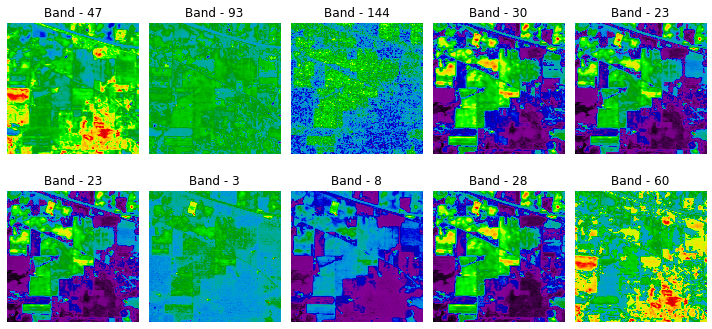

In [4]:
#visualizing the bands
fig = plt.figure(figsize = (10, 5))

ax = fig.subplots(2, 5)

for i in range(2):
    for j in range(5):
        c = np.random.randint(200)
        ax[i][j].imshow(X[:, :, c], cmap = "nipy_spectral")
        ax[i][j].axis("off")
        ax[i][j].title.set_text(f"Band - {c}")
        c+=1

plt.tight_layout()

plt.show()

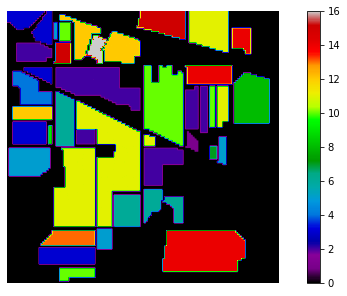

In [5]:
#visualizing of groundtruth
def plot_data(pines):
    fig = plt.figure(figsize = (10, 5))
    plt.imshow(y, cmap = "nipy_spectral")
    plt.colorbar()
    plt.axis("off")
    plt.show()

plot_data(y)

In [6]:
def extract_pixels(X,y):
    
    data = X.reshape(-1, X.shape[2])
    pines = pd.DataFrame(data = data)
    pines = pd.concat([pines, pd.DataFrame(data = y.ravel())], axis = 1)
    pines.columns= [f"band{i}" for i in range(1, 1+X.shape[2])] + ["class"]
    pines.to_csv("pinesdata.csv")
    return pines

pines = extract_pixels(X, y)    

In [7]:
pines.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band192,band193,band194,band195,band196,band197,band198,band199,band200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [8]:
pines.shape

(21025, 201)

In [9]:
pines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21025 entries, 0 to 21024
Columns: 201 entries, band1 to class
dtypes: uint16(200), uint8(1)
memory usage: 8.0 MB


In [10]:
pines.isnull().sum()

band1      0
band2      0
band3      0
band4      0
band5      0
          ..
band197    0
band198    0
band199    0
band200    0
class      0
Length: 201, dtype: int64

In [11]:
pines.duplicated().sum()

0

In [12]:
pines.describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band192,band193,band194,band195,band196,band197,band198,band199,band200,class
count,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,...,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000
mean,2957.363472,4091.321237,4277.502259,4169.956671,4516.678668,4790.595149,4848.317574,4714.732509,4668.904828,4439.065541,...,1061.927848,1060.210273,1063.276813,1050.048514,1040.201141,1043.370321,1030.194816,1015.571463,1008.513579,4.224923
std,354.918708,230.390005,257.827640,280.761254,346.035984,414.382138,469.247667,491.728349,533.232855,539.908195,...,38.843805,38.712195,41.920969,34.242725,26.452672,29.794418,20.865106,11.386402,7.050921,5.281972
min,2560.000000,2709.000000,3649.000000,2810.000000,3840.000000,4056.000000,4004.000000,3865.000000,3775.000000,2792.000000,...,998.000000,999.000000,999.000000,993.000000,990.000000,992.000000,989.000000,986.000000,981.000000,0.000000
25%,2602.000000,3889.000000,4066.000000,3954.000000,4214.000000,4425.000000,4421.000000,4263.000000,4173.000000,3940.000000,...,1026.000000,1024.000000,1024.000000,1019.000000,1016.000000,1016.000000,1012.000000,1006.000000,1004.000000,0.000000
50%,2780.000000,4106.000000,4237.000000,4126.000000,4478.000000,4754.000000,4808.000000,4666.000000,4632.000000,4404.000000,...,1053.000000,1052.000000,1054.000000,1043.000000,1033.000000,1035.000000,1026.000000,1014.000000,1009.000000,0.000000
75%,3179.000000,4247.000000,4479.000000,4350.000000,4772.000000,5093.000000,5198.000000,5100.000000,5084.000000,4860.000000,...,1099.000000,1098.000000,1104.000000,1083.000000,1066.000000,1072.000000,1050.000000,1024.000000,1014.000000,10.000000
max,4536.000000,5744.000000,6361.000000,6362.000000,7153.000000,7980.000000,8284.000000,8128.000000,8194.000000,7928.000000,...,1287.000000,1289.000000,1315.000000,1258.000000,1201.000000,1245.000000,1167.000000,1076.000000,1036.000000,16.000000


In [13]:
#Principal Component Analysis(PCA)
pca = PCA(n_components = 80)

In [14]:
principalComponents = pca.fit_transform(pines)
ev = pca.explained_variance_ratio_

In [15]:
ev

array([6.84937528e-01, 2.35313543e-01, 1.49635396e-02, 8.21543227e-03,
       6.95012750e-03, 5.17010701e-03, 3.99681154e-03, 3.62359908e-03,
       3.07127269e-03, 2.93211761e-03, 2.67352834e-03, 2.49229944e-03,
       2.24688212e-03, 1.89388676e-03, 1.69434305e-03, 1.56043702e-03,
       1.53162388e-03, 1.35012957e-03, 1.00138965e-03, 9.24874694e-04,
       8.47884121e-04, 7.64385411e-04, 6.64597007e-04, 6.45680426e-04,
       6.16360583e-04, 5.61408927e-04, 5.43160665e-04, 5.15585128e-04,
       4.21073623e-04, 3.65029748e-04, 3.62711009e-04, 3.53239515e-04,
       3.24037211e-04, 3.13691891e-04, 3.03385418e-04, 2.87733751e-04,
       2.79164296e-04, 2.72731345e-04, 2.62985400e-04, 2.50311312e-04,
       2.46112535e-04, 2.32228734e-04, 2.11368775e-04, 1.94079617e-04,
       1.81978323e-04, 1.70834580e-04, 1.55749872e-04, 1.41898394e-04,
       1.37335866e-04, 1.36430838e-04, 1.33485428e-04, 1.23374701e-04,
       1.21877855e-04, 1.20991219e-04, 1.14749862e-04, 1.13124531e-04,
      

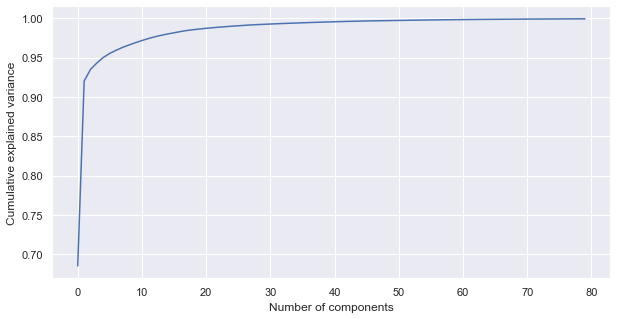

In [16]:
sns.set()
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(ev))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [17]:
#select 40 components for PCA

pca = PCA(n_components = 40)
data = pca.fit_transform(pines)
data_pines = pd.concat([pd.DataFrame(data = data), pd.DataFrame(data = y.ravel())], axis = 1)
data_pines.columns = [f"PC-{i}" for i in range(1,41)] + ["class"]

In [18]:
data_pines.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37,PC-38,PC-39,PC-40,class
0,5014.905666,1456.863532,72.697659,71.201097,-435.684652,-68.843395,134.809889,-304.368890,256.430066,-66.626540,...,19.157756,-2.588945,21.230668,-19.792669,-29.071430,-23.117503,1.029936,63.494042,7.725671,3
1,5601.383449,-2023.449776,350.135434,-528.457150,148.103474,-288.362805,202.955979,240.853103,-474.859033,93.492002,...,99.605121,-81.003876,-51.039658,28.768826,13.637743,23.425830,3.813335,14.391720,40.067323,3
2,5796.135157,-3090.394530,490.540543,-760.205252,259.951278,-131.614623,172.926692,205.913452,572.491249,-191.616168,...,36.559516,-36.013107,-14.498664,19.200298,36.557169,19.186642,24.442059,-36.092995,84.179566,3
3,5586.204284,-2369.375772,356.275521,-502.679330,146.569635,-306.682884,251.070335,234.970866,-314.024290,54.961556,...,128.580332,-64.794886,33.788966,20.855549,67.337061,11.644602,51.222236,1.460006,54.701000,3
4,5020.990484,339.603668,-23.006921,-92.558404,-368.488749,-438.269709,502.715603,-345.532501,-188.354920,-67.505066,...,-84.355721,72.206118,183.836829,-7.557679,-14.794994,14.779556,0.435589,63.728202,14.466718,3


In [19]:
#saving to .csv
data_pines.to_csv("Pines_PCA.csv", index = False)

In [20]:
x = data_pines[data_pines["class"] != 0]

X = x.iloc[:, :-1].values

y = x.loc[:, "class"].values 

names = ["Alfalfa", "Corn-notill", "Corn-mintill", "Corn", "Grass-pasture", "Grass-trees", "Grass-pasture-mowed", "Hay-windrowed", "Oats", "Soybean-notill", "Soybean-mintill", "Soybean-clean", "Wheat", "Woods", "Buildings-Grass-Trees-Drives", "Stone-Steel-Towers"]

In [21]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11, stratify = y)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7174, 40), (3075, 40), (7174,), (3075,))

In [23]:
#Random Forest Classifier
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [24]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [26]:
print("Accuracy on Training Data: ", training_data_accuracy)

Accuracy on Training Data:  1.0


In [27]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [28]:
print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Test Data:  0.8227642276422764


In [29]:
#classification report
print(classification_report(y_test, X_test_prediction, target_names = ["Brocoli_green_weeds_1", "Brocoli_green_weeds_2", "Fallow", "Fallow_rough_plow", "Fallow_smooth", "Stubble", "Celery", "Grapes_untrained", "Soil_vinyard_develop", "Corn_senesced_green_weeds", "Lettuce_romaine_4wk", "Lettuce_romaine_5wk", "Lettuce_romaine_6wk", "Lettuce_romaine_7wk", "Vinyard_untrained", "Vinyard_vertical_trellis"]))

                           precision    recall  f1-score   support

    Brocoli_green_weeds_1       0.90      0.64      0.75        14
    Brocoli_green_weeds_2       0.74      0.74      0.74       428
                   Fallow       0.84      0.62      0.71       249
        Fallow_rough_plow       0.70      0.49      0.58        71
            Fallow_smooth       0.93      0.89      0.91       145
                  Stubble       0.92      0.98      0.95       219
                   Celery       1.00      0.88      0.93         8
         Grapes_untrained       0.95      0.99      0.97       143
     Soil_vinyard_develop       1.00      0.33      0.50         6
Corn_senesced_green_weeds       0.83      0.73      0.78       292
      Lettuce_romaine_4wk       0.76      0.90      0.83       737
      Lettuce_romaine_5wk       0.75      0.70      0.72       178
      Lettuce_romaine_6wk       0.97      0.98      0.98        61
      Lettuce_romaine_7wk       0.90      0.98      0.94     

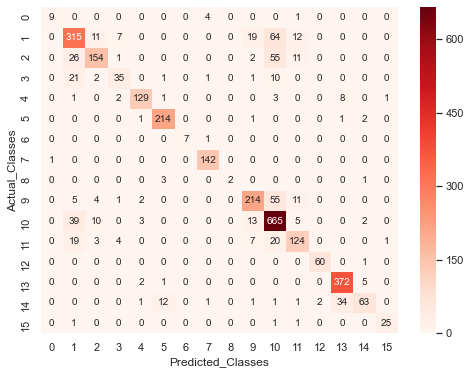

In [30]:
#confusion matrix
plt.figure(figsize = (8,6))

c_matrix = confusion_matrix(y_test, X_test_prediction)

sns.heatmap(c_matrix, annot = True, annot_kws = {"size": 10}, fmt = "d", cmap = "Reds")
plt.xlabel("Predicted_Classes")
plt.ylabel("Actual_Classes")
plt.show()

In [31]:
import math
MSE = np.square(np.subtract(y_test,X_test_prediction)).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n", RMSE)

Root Mean Square Error:
 2.745284204932826


In [32]:
print("Mean Absolute Error (MAE)", mean_absolute_error(y_test,X_test_prediction))

Mean Absolute Error (MAE) 20.68910569105691


In [33]:
l =[]

for i in range(data_pines.shape[0]):
    if data_pines.iloc[i, -1] == 0:
        l.append(0)
    else:
        l.append(model.predict(data_pines.iloc[i, :-1].values.reshape(1, -1)))

<ipython-input-34-faecb03e68ff>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clmap = np.array(l).reshape(145, 145).astype("float")


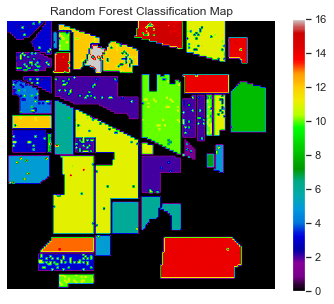

In [34]:
plt.figure(figsize = (6, 5))
clmap = np.array(l).reshape(145, 145).astype("float")
plt.imshow(clmap, cmap = "nipy_spectral") 
plt.colorbar()
plt.axis("off")
plt.title("Random Forest Classification Map")
plt.savefig("randomforest_classification_map.png")
plt.show()